## Exemple 1
### Plou a bots i barrals

[<center><img src=./static/Les_Parapluies_de_Viborg.jpg width=50%></center>](#img_Parapluies)

[Edwards 2001](#bib_Edwards) Cap. 3.4

In [338]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Formulació del problema
- Àmbit d'estudi: Està plovent, i he d'anar a casa
- Canvi que es busca: Mullar-me el mínim possible
- Precisió de l'estudi: 100 ml

## Anàlisis del sistema
- Context
- Factors i esdeveniments mesurables
- Relacions, comportament i estats

## Anàlisis del sistema
### Context
- Està plovent
- Fa un poc de vent i les gotes cauen amb cert angle

## Anàlisis del sistema
### Factors i esdeveniments mesurables
- Distancia a recórrer: $1000\;m$
- Velocitat de les gotes: $4 \;ms^{-1}$
- Angle de les gotes: $10 ^{\circ}$
- Flux de pluja: $4 \;l \; m^{-2} h^{-1}$
- Velocitat caminant: $2 \;ms^{-1}$
- Velocitat corrent: $6 \;ms^{-1}$
- Mides del cos: $50 \times 20 \times 180 \;cm^3$

## Anàlisis del sistema
### Relacions, comportament i estats
<img src=./static/Plou.png width=50%>

## Anàlisis del sistema
### Relacions, comportament i estats
- Com més estona estic sota l'aigua, més em mullo
- Com més fort plou més em mullo
- Com més vent fa més em mullo

## Modelat
- Representació matemàtica de variables i relacions
- Anàlisi del model
- Interpretació del model en el context

<img src=./static/Plou_sim.png width=50%>

## Modelat
### Representació matemàtica de variables i relacions

- Distancia a recórrer: $D = 1000\;m$
- Flux de pluja: $\phi = 4 \;l \; m^{-2} h^{-1}$
- Velocitat caminant: $v_{lent} = 2 \;ms^{-1}$
- Velocitat corrent: $v_{ràpid} = 6 \;ms^{-1}$
- Velocitat de les gotes: $u = 4 \;ms^{-1}$
- Angle de les gotes: $\theta = 10^{\circ}$
- Mides del cos: $(x,y,z) = 50 \times 20 \times 180 \;cm^3$

In [357]:
from sympy.abc import D, v, u, theta, x, y, z
flux = sp.symbols("\phi")

valors = {
    D: 1000 * meter,
    flux: 4 * liter / meter/ meter / hour,
    v: 2 * meter / second,
    u: 4 * meter / second,
    theta: 10 * pi / 180,
    x: 0.50 * meter,
    y: 0.20 * meter,
    z: 1.80 * meter,
}

## Modelat
### Representació matemàtica de variables i relacions
- El volum d'aigua depén del flux i del temps
    - Volum d'aigua al cap: $V_s = \phi_z \times t$
- El volum d'aigua depén de la velocitat del vent
    - Volum d'aigua al frontal: $V_f = \phi_y \times t \times u\, sin(\theta)$
- Temps sota l'aigua: $t = D / v$

In [353]:
t = D / v
Vs = flux * t
Vf = flux * t * u *sin(theta)

show(
    "V_s = ", Vs, qq,
    "V_f = ", Vf,
)

<IPython.core.display.Math object>

## Modelat
### Anàlisi del model
- Anàlisi dimensional

In [340]:
show(
    SI.get_dimensional_expr(Vs.subs(valors)), qq,
    SI.get_dimensional_expr(Vf.subs(valors)),
)

<IPython.core.display.Math object>

## Modelat
### Anàlisi del model
- Anàlisi dimensional
    - El volum d'aigua depèn de la superfície exposada
    - Assumim un cos en forma de paral·lelepípede
    - El flux de pluja i la velocitat són proporcionals
        - Introduirem un factor de normalització $I$
        - La velocitat relativa de la pluja depèn de la nostra velocitat

In [388]:
Ss = x * y
Vs = I * t * u * cos(theta) * Ss

I = flux / u
Sf = x * z
Vf = I * t * (u * sin(theta) + v) * Sf

show(
    "V_s = ", Vs, qq,
    SI.get_dimensional_expr(Vs.subs(valors)), qq,
    "V_f = ", Vf, qq,
    SI.get_dimensional_expr(Vf.subs(valors)),
)

<IPython.core.display.Math object>

In [389]:
V = Vs + Vf

show(
    "V = ", sp.simplify(V), qq,
    SI.get_dimensional_expr(V.subs(valors)), 
)

<IPython.core.display.Math object>

In [390]:
v_ms = sp.symbols("v_{m/s}")

val = valors.copy()
val[v] = v_ms * meter / second
val[flux] = convert_to(val[flux], liter / meter/ meter / second)

V_v = sp.simplify(V.subs(val) / liter)

show("V(v_{m/s}) = ", V_v)

<IPython.core.display.Math object>

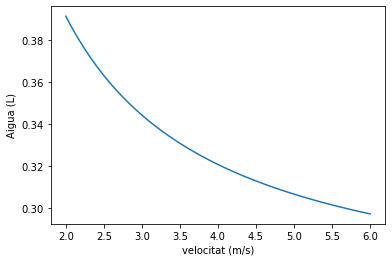

<IPython.core.display.Math object>

In [394]:
V_lam = sp.lambdify(v_ms, V_v, "numpy")

X = np.linspace(2, 6, 50)
Y = V_lam(X)

plt.plot(X, Y)
plt.xlabel('velocitat (m/s)')
plt.ylabel('Aigua (L)')
plt.show()

show("V_{2m/s} = ", V_lam(2), qq, "V_{6m/s} = ", V_lam(6))

## Modelat
### Interpretació del model en el context


- El nostre model es pot dividir entre el volum superficial i frontal

- Una component del volum frontal és independent de la nostra velocitat

- L'altre component és inversament proporcional a la nostra velocitat

## Recol·lecció i anàlisis de dades
- Experiment
- Procés de mesura
- Ajust del model a les dades

## Recol·lecció i anàlisis de dades
### Experiment
- Mesura amb un got horitzontal a diferents velocitats
- Mesura amb un got vertical
- Mesurem amb una xeringuilla amb precisió de $0.2 \,mL$

In [384]:
from sympy.abc import d
valors[d] = 0.05 * meter

S = pi * (d/2)**2

Vs = I * t * u * S
Vf = I * t * (u * sin(theta) + v) * S

V = Vs + Vf

show(
    "V = ", sp.simplify(V), qq,
    SI.get_dimensional_expr(V.subs(valors)), 
)

<IPython.core.display.Math object>

In [385]:
v_ms = sp.symbols("v_{m/s}")

val = valors.copy()
val[v] = v_ms * meter / second
val[flux] = convert_to(val[flux], liter / meter/ meter / second)

Vs_v = sp.simplify(Vs.subs(val) / liter)
Vf_v = sp.simplify(Vf.subs(val) / liter)

show("Vs_{2m/s} = ", Vs_v.subs({v_ms: 2}).n(2), qq, "Vf_{2m/s} = ", Vf_v.subs({v_ms: 2}).n(2))
show("Vs_{1m/s} = ", Vs_v.subs({v_ms: 1}).n(2), qq, "Vf_{1m/s} = ", Vf_v.subs({v_ms: 1}).n(2))
show("Vs_{0.5m/s} = ", Vs_v.subs({v_ms: 0.5}).n(2), qq, "Vf_{0.5m/s} = ", Vf_v.subs({v_ms: 0.5}).n(2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Recol·lecció i anàlisis de dades
### Procés de mesura
|     | $V_s$ mesurat | $V_s$ esperat | $V_f$ mesurat | $V_f$ esperat |
| --- | :---: | :---: | :---: | :---: |
| 2 m/s | 1.0 ± 0.2 mL | $1.1$ | 0.6 ± 0.2 mL | $0.7$ |
| 1 m/s | 2.2 ± 0.2 mL | $2.1$ | 0.8 ± 0.2 mL | $0.9$ |
| 0.5 m/s | 4.4 ± 0.2 mL | $4.3$ | 1.2  ± 0.2 mL | $1.3$ |

## Recol·lecció i anàlisis de dades
### Ajust del model a les dades
- No tenim dades suficients per ajustar

## Validació i verificació del model
- El model serveix per resoldre el problema
- El model és prou precís

## Validació i verificació del model
### El model serveix per resoldre el problema
- El model ens permet calcular quant ens banyarem
- Ens dona un criteri per triar la nostra velocitat
- Ens hi ha permés interpretar millor el problema

## Validació i verificació del model
### El model és prou precís
- Demanàvem una precisió de $100 mL$
- Assumim un 10% d'error, dominat per l'error sistemàtic
- La predicció seria:
    - A $2 \,m/s$ mullar-se $390 \pm 40\,mL$ 
    - A $6 \,m/s$ mullar-se $300 \pm 30\,mL$ 

## Interpretació dels resultats
- Anàlisi crítica
- Revisió i millora del model

## Interpretació dels resultats
### Anàlisi crítica
- Com més ràpid anem menys ens mullarem
- La direcció del vent ens pot ajudar a mullar-nos menys
- Hem disposat de poques dades experimentals
- Però ens ha permès validar el model

## Interpretació dels resultats
### Revisió i millora del model
- El model és adequat per als requeriments inicials

# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='img_Parapluies'></a> https://commons.wikimedia.org/wiki/File:Les_Parapluies_de_Viborg.jpg

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg